#Plotting Sigmoid Function

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import notebook

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [4]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [5]:
sigmoid(1, 0.5, 0)

0.6224593312018546

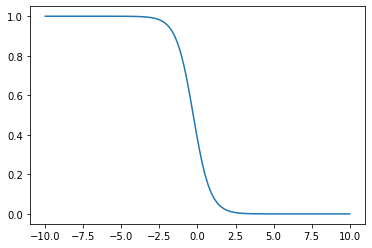

In [6]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.5  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [7]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [8]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [9]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [19]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [11]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

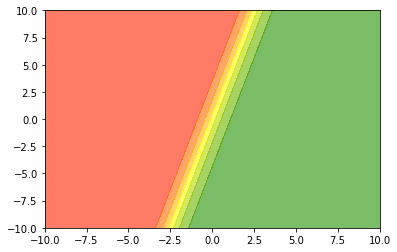

In [20]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

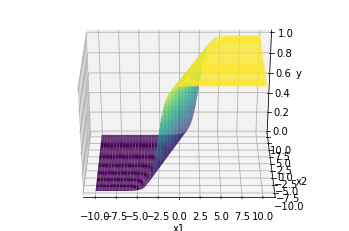

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [28]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

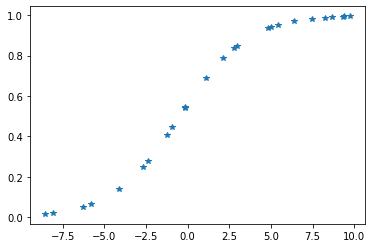

In [29]:
plt.plot(X, Y, '*')
plt.show()

In [30]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [31]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [32]:
WW.shape

(101, 101)

In [33]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

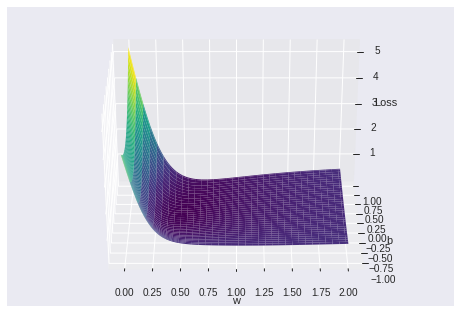

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [34]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [35]:
print(i, j)

63 25


In [36]:
print(WW[i, j], BB[i, j])

0.5 0.26


# Class for Sigmoid Neuron

In [41]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in notebook.tqdm(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [38]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [43]:
sn = SigmoidNeuron()
sn.fit(X, Y, 100, 0.25, True)

In [53]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()


[[-1.10180995 -0.37454639]] [0.00348439]



[[-0.89519189 -0.53748569]] [0.03457408]



[[-0.60659969 -0.62130326]] [0.03337117]



[[-0.1008401  -0.69635906]] [0.03238427]



[[ 0.39464858 -0.60709257]] [0.06812106]



[[ 0.72484138 -0.23580873]] [0.08125669]



[[ 0.83681793 -0.29040006]] [0.00951902]



[[ 0.93719998 -0.30107498]] [-0.05370976]



[[ 1.00964433 -0.34638661]] [-0.11153651]



[[ 1.08503295 -0.35003547]] [-0.1623096]



[[ 1.14077285 -0.38512102]] [-0.20917576]



[[ 1.19954487 -0.39148657]] [-0.2507338]



[[ 1.24670277 -0.41467986]] [-0.28918136]



[[ 1.29346929 -0.42536849]] [-0.32393875]



[[ 1.33456624 -0.44064438]] [-0.35607775]



[[ 1.37342987 -0.45238509]] [-0.38563585]



[[ 1.40925394 -0.46417961]] [-0.41305672]



[[ 1.44280339 -0.47493163]] [-0.43854779]



[[ 1.47423642 -0.48507538]] [-0.46234212]



[[ 1.5038153  -0.49460842]] [-0.48462269]



[[ 1.53173341 -0.50360817]] [-0.50554986]



[[ 1.55816024 -0.51212745]] [-0.52526116]



[[ 1.58324074 -0.52021318]] [-0.54387569]



[[ 1.60710028 -0.52790579]] [-0.56149701]



[[ 1.62984788 -0.53524045]] [-0.57821558]



[[ 1.65157893 -0.54224792]] [-0.5941108]



[[ 1.67237731 -0.54895525]] [-0.60925261]



[[ 1.69231716 -0.55538635]] [-0.62370288]



[[ 1.71146431 -0.56156243]] [-0.63751657]



[[ 1.72987743 -0.56750239]] [-0.65074269]


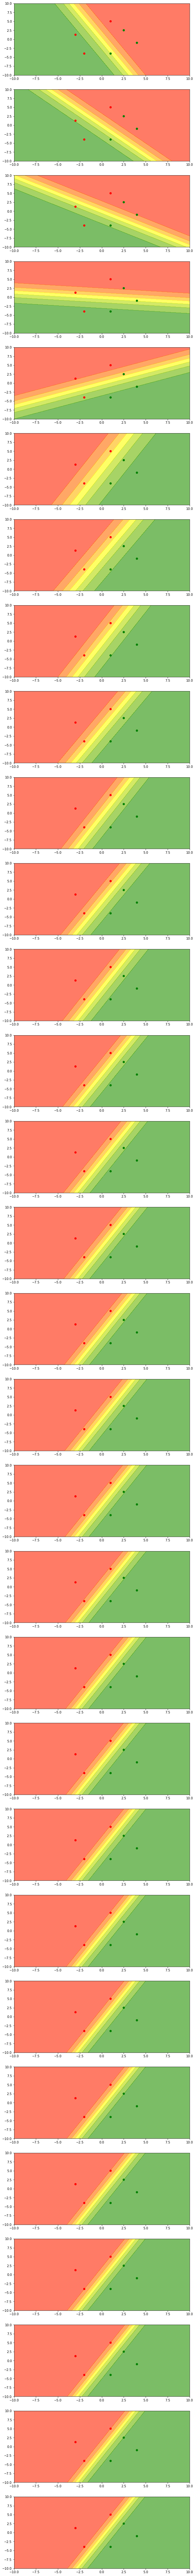

In [55]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)
    


# Load Data

In [0]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

--2019-02-26 05:17:04--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/739uo8ebwbic9kb/mobile_cleaned.csv [following]
--2019-02-26 05:17:04--  https://www.dropbox.com/s/raw/739uo8ebwbic9kb/mobile_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc13fb77f6fedcc765e931955638.dl.dropboxusercontent.com/cd/0/inline/AcD4vBR7BLdCbPKdJyoO-EIk-ZrDbRMA-eaLOv-O_u47wr5y5geXCk4afOKzW52HB1bodEutwYs10tKp7_lxEeploLsXxt3kitfZXATc4EM_bIVfp9U6hI0W0MSs6_rC-bY/file# [following]
--2019-02-26 05:17:04--  https://uc13fb77f6fedcc765e931955638.dl.dropboxusercontent.com/cd/0/inline/AcD4vBR7BLdCbPKdJyoO-EIk-ZrDbRMA-eaLOv-O_u47wr5y5geXCk4afOKzW52HB1bodEutwYs10tKp7_lxEeploLsXxt3k

In [0]:
!ls

mobile_cleaned.csv  mobile_cleaned.csv.1  sample_data


In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [0]:
data.head()

PhoneId  Pixel Density  Screen Size  Weight  RAM  Processor_frequency  \
0        0            403         6.26     182    4                  1.8   
1        1            271         6.20     168    3                  1.8   
2        2            409         6.30     168    3                  2.1   
3        4            411         6.00     169    4                  2.2   
4        5            396         6.50     175    4                  2.2   

   Screen to Body Ratio (calculated)  Height  Internal Memory  Capacity  \
0                              80.68   157.9               64      4000   
1                              80.85   156.2               32      4230   
2                              83.68   157.0               32      3500   
3                              74.78   159.8               64      3300   
4                              84.23   160.4               64      3750   

    ...    os_name_Tizen  os_name_iOS  SIM Slot(s)_Dual SIM, GSM+CDMA  \
0   ...                0            0                               0   
1   ...                0            0                               0   
2   ...                0            0                               0   
3   ...                0            0                               0   
4   ...                0            0                               0   

   SIM Slot(s)_Dual SIM, GSM+GSM  SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE  \
0                              0                                          1   
1                              0                                          1   
2                              0                                          1   
3                              1                                          0   
4                              0                                          1   

   SIM Slot(s)_Single SIM, GSM  Sim1_2G  Sim1_3G  Sim1_4G  Rating  
0                            0        0        0        1     4.5  
1                            0        0        0        1     4.5  
2                            0        0        0        1     4.4  
3                            0        0        0        1     4.3  
4                            0        0        0        1     4.4  

[5 rows x 88 columns]

In [0]:
data.shape

(341, 88)

In [0]:
X = data.drop('Rating', axis=1)

In [0]:
Y = data['Rating'].values

In [0]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [0]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = data['Class'].values

## Standardisation

In [0]:
R = np.random.random([100, 1])

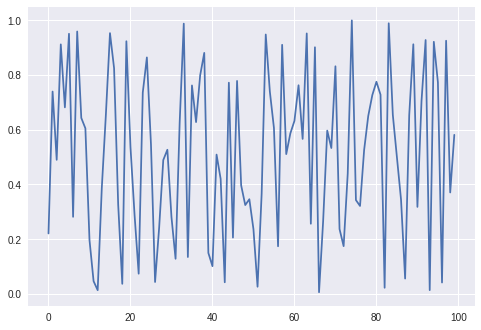

In [0]:
plt.plot(R)
plt.show()

In [0]:
np.mean(R)

0.5148191483674861

In [0]:
np.std(R)

0.30067879275246223

In [0]:
scaler = StandardScaler()

In [0]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaler.mean_

array([0.51481915])

In [0]:
RT = scaler.transform(R)

In [0]:
np.mean(RT)

3.2085445411667025e-16

In [0]:
np.std(RT)

0.9999999999999999

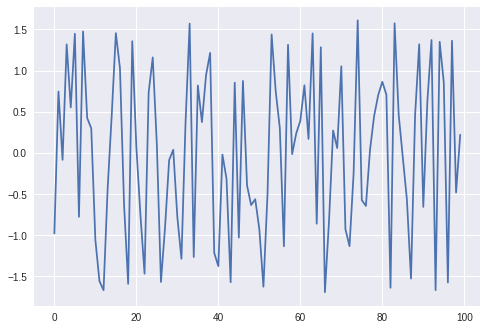

In [0]:
plt.plot(RT)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [0]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [0]:
scaler = StandardScaler()

In [0]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [0]:
np.min(Y_scaled_train)

0.0

In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [0]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [0]:
scaled_threshold

0.6800000000000002

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [0]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

# Train on Real Data

In [0]:
sn = SigmoidNeuron()

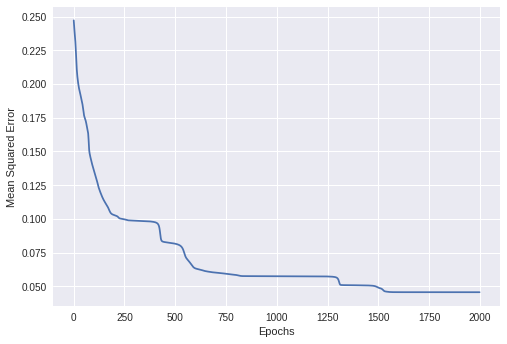

In [0]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [0]:
print(accuracy_train, accuracy_test)

0.7333333333333333 0.7558139534883721
